# EYE penalty

$$\text{EYE}_{\alpha,\beta}(\boldsymbol{\theta}) = \Vert (1-\boldsymbol{r}) \odot \boldsymbol{\theta} \Vert_1 + 
\sqrt{\alpha \Vert (1-\boldsymbol{r}) \odot \boldsymbol{\theta} \Vert_1^2 +
\beta \Vert \boldsymbol{r} \odot \boldsymbol{\theta} \Vert_2^2}$$

where $\boldsymbol{\theta} \in \mathbb{R}^d$ is the linear model's parameter, $\boldsymbol{r} \in [0,1]^d$ marks risk factor for the corresponding feature in $\boldsymbol{x} \in \mathbb{R}^d$. Note that previously, we assume $\boldsymbol{r} \in \{0,1\}^d$ (binary setting), now we extend it to continous setting.

## Desirable Properties

**definition "risk consistency":** If $x_i = x_j$ and $r_i \geq r_j$, then $\theta_i > \theta_j$. 

*Example:* Weighted l1 and l2 norm with weight that agrees to the inverse order of $r$ is risk consistent. Note that l2 is by definition consistent because all duplicated features will be given the same weight (not violate the order given by $\boldsymbol{r}$). 

**definition "strict risk consistency:"** If $x_i = x_j$ and $r_i \geq r_j$, then $\theta_i \geq \theta_j$.

*Example:* Weighted l2 norm with weight that agrees to the inverse order of $r$ is strictly risk consistent.

**definition "axis ratio":** The axis ratio is the longest axis distance divided by the shortest axis distance for a given polytope generated by a regularization.

*Example*: l1 and l2 and elastic net have axis ratio of 1 (1 is the smallest axis ratio). EYE and its variants proposed below has axis ratio of $\frac{1 + \sqrt{\alpha}}{\sqrt{\beta}}$.

**definition "sparsity":** The percent of learned weights $\boldsymbol{\theta}$ that are set to exactly 0.

*Example*: l1 regularized model are sparse and l2 is not.

**Goal:** We want to learn a *sparse* model (interpretable) with small *axis ratio* (reduce bias) that is *risk consistent* (respect expert knowledge when features are perfectly correlated). For optimization convenience, we prefer a *convex* and *homogenous* penalty. 

## Challenge with current formulation

We still don't know if the $\alpha, \beta$ formulation is risk consistent for all pairs of $(r_i, r_j)$ values, and the main culprit is the l2 constrained term that penalyzes features with large theta more.

Consider a more general version of our penalty term, where we have some idea of how to group features into known and unknown variables (perhaps by thresholding on $r$)

$$\Vert (1-r) \odot \boldsymbol{\theta} \Vert_1 + \sqrt{\alpha \Vert \boldsymbol{\theta_u} \Vert_a^2 + \beta \Vert \boldsymbol{\theta_k} \Vert_2^2}$$

where $\boldsymbol{\theta_u}$ and $\boldsymbol{\theta_k}$ are the weights for unknown and known variables, and $a$ is $1$ or $2$ depending on if more sparsity is wanted. Then we can show that with $a=2$, $\alpha \geq \beta$, the resulting penalty is strictly risk consistent. Also note that this form is convex and homogenous.

Let's look at a special case with $\alpha = \beta = 1$:

$$\text{EYE2}(\boldsymbol{\theta}) = \Vert (1-\boldsymbol{r}) \odot \boldsymbol{\theta} \Vert_1 + \Vert \boldsymbol{\theta} \Vert_2$$



consistency proof idea: 

\begin{equation*}
\begin{aligned}
& \underset{\boldsymbol{\theta}}{\text{minimize}}
& & - \sum_{i} \theta_i \\
& \text{subject to}
& & \text{EYE2}(\boldsymbol{\theta}) \leq C
\end{aligned}
\end{equation*}

where C any positive constant (won't affect result because EYE2 is homogenous). The solution is
$\frac{\theta_i}{\theta_j} = \frac{r_i + 1/\lambda - 1}{r_j + 1/\lambda -1}$ where both denominator and numerator are non negative with $\lambda > 0$ (this doesn't hold if $\theta_i = \theta_j=0$, so when plotting the ratio, I'm expecting relu like curve). This shows that the learned weights are monotone (note that this formula says that fixing $\boldsymbol{r}$ determines the weight ratio, doesn't apply to the simulation result because $\boldsymbol{r}$ is changing).



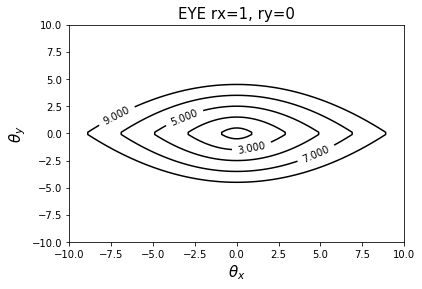

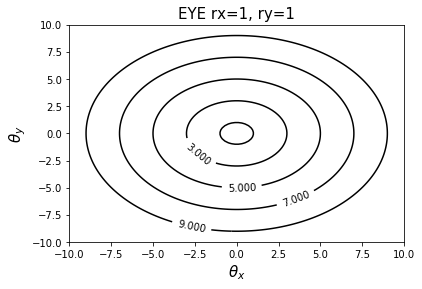

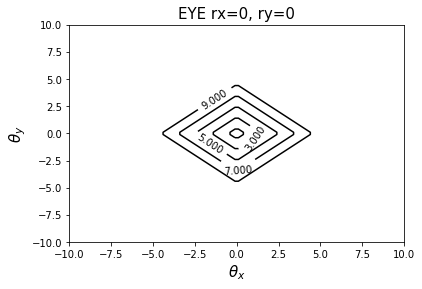

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def drawContour(f, name, c='k', r=(-10,10), levels=[1,3,5,7,9], labels=None):
    a, b = r
    xlist = np.linspace(a, b, 100)
    ylist = np.linspace(a, b, 100)
    X, Y = np.meshgrid(xlist, ylist)
    cp = plt.contour(X, Y, f(X, Y), levels, colors=c)
    if labels is None:
        plt.clabel(cp, inline=True, fontsize=10)
    else:
        fmt = {}
        for l, s in zip(cp.levels, labels):
            fmt[l] = s
        plt.clabel(cp, fmt=fmt, inline=True, fontsize=10)
    plt.title(name, fontsize=15)
    plt.xlabel(r'$\theta_{x}$', fontsize=15)
    plt.ylabel(r'$\theta_{y}$', fontsize=15)

def EYE(r0, r1, alpha=1, beta=1):

    def Penalty(X, Y):
        l1 = abs((1-r0) * X) + abs((1-r1) * Y)
        l2sq = (r0 * X)**2 + (r1 * Y)**2
        return l1 + np.sqrt(alpha * l1**2 + beta * l2sq)

    return Penalty

def EYE2(r0, r1, alpha=1, beta=1):

    def Penalty(X, Y):
        l1 = abs((1-r0) * X) + abs((1-r1) * Y)
        l2sq = X**2 + Y**2
        return l1 + np.sqrt(l2sq)

    return Penalty

drawContour(EYE(1, 0), "EYE rx=1, ry=0")
plt.show()

drawContour(EYE(1, 1), "EYE rx=1, ry=1")
plt.show()

drawContour(EYE(0, 0), "EYE rx=0, ry=0")
plt.show()

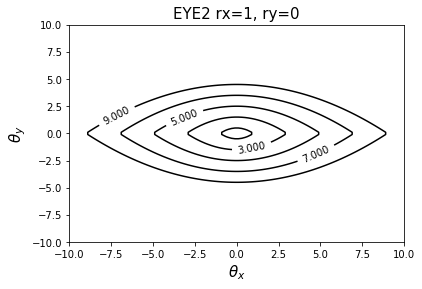

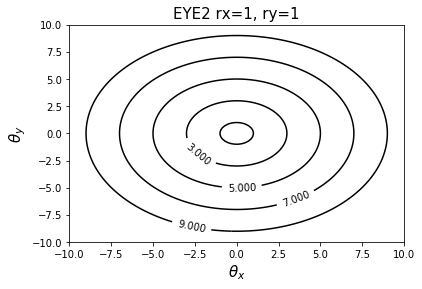

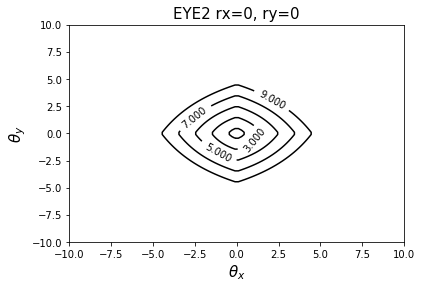

In [18]:
drawContour(EYE2(1, 0), "EYE2 rx=1, ry=0")
plt.show()

drawContour(EYE2(1, 1), "EYE2 rx=1, ry=1")
plt.show()

drawContour(EYE2(0, 0), "EYE2 rx=0, ry=0")
plt.show()

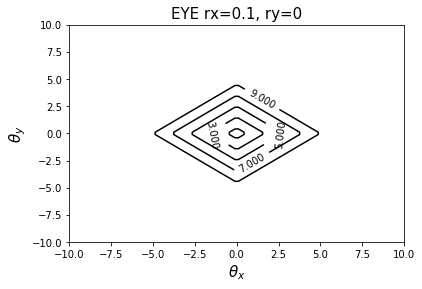

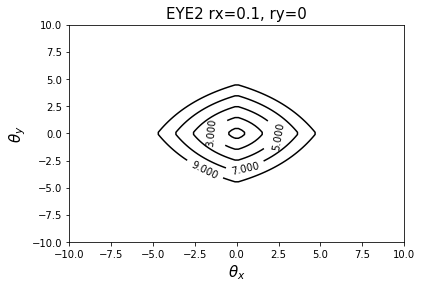

In [36]:
drawContour(EYE(0.1, 0), "EYE rx=0.1, ry=0")
plt.show()

drawContour(EYE2(0.1, 0), "EYE2 rx=0.1, ry=0")
plt.show()

The sparsity consitraint still holds for the for rx=1, ry=0 case, but no longer holds for all rx > 0, ry=0, that is the resulting solution for EYE2 won't be as sparse as the original EYE.

## Mystery remains

While I give some examples of what a risk consistent model looks like, we still are not sure if those are the only models we want to focus on. For example, if we truly want sparisty, we should set $a=1$, and we are not sure if that still gives us risk consistent model or not.

In addition, is an axis ratio of $2$ the best we can do to be risk consistent? That is do we really need $\alpha \geq \beta$? And under which setting does the original EYE penalty becomes consistent (the empirical update from last time does suggest a lot of structure even in the original formulation)? The answer has to force us to understand $\lambda$ better.

Other more general questions include a) how should we set $\alpha$ and $\beta$? to keep axis ratio small? b) how sensitive is risk consistency to the correlation structure? 